In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [62]:
ct_df = pd.read_csv("raw_data/clinicaltrial_data.csv")
md_df = pd.read_csv("raw_data/mouse_drug_data.csv")

merged_df = pd.merge(ct_df, md_df, on="Mouse ID")
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [63]:
merged_df['Drug'].unique()

#group_drug_df.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
#keep: Capomulin, Infubinol, Ketapril, and Placebo
merged_df.loc[(merged_df['Drug'] != 'Ceftamin') & \
              (merged_df['Drug'] !='Naftisol') & \
              (merged_df['Drug'] !='Naftisol') & \
              (merged_df['Drug'] != 'Propriva') & \
              (merged_df['Drug'] !='Ramicane') & \
              (merged_df['Drug'] !='Stelasyn') & \
              (merged_df['Drug'] !='Zoniferol') ,:]

group_drug_df = merged_df.groupby(['Drug','Timepoint'])
TumorVolumeMean_df = group_drug_df.mean()['Tumor Volume (mm3)']
TumorVolumeMean_df.head()

TVM_indexreset_df = TumorVolumeMean_df.reset_index()
TVM_indexreset_df.head()

CapomulinMeanVolume = TVM_indexreset_df.loc[test['Drug'] == 'Capomulin']
InfubinolMeanVolume = TVM_indexreset_df.loc[test['Drug'] == 'Infubinol']
KetaprilMeanVolume = TVM_indexreset_df.loc[test['Drug'] == 'Ketapril']
PlaceboMeanVolume = TVM_indexreset_df.loc[test['Drug'] == 'Placebo']


#group_drug_df.count().head(20)


In [66]:
plt.scatter(CapomulinMeanVolume['Timepoint'],CapomulinMeanVolume['Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.scatter(InfubinolMeanVolume['Timepoint'],InfubinolMeanVolume['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

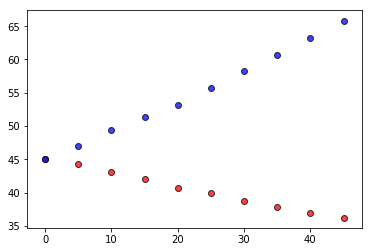

In [67]:
plt.show()

In [56]:
#x_limit = 45
# List of values from 0 to 100 each value being 1 greater than the last
#x_axis = np.arange(1, x_limit, 1)
#plt.scatter(x_axis, group_drug_df['Drug'], marker="o", facecolors="red", edgecolors="black",alpha=0.75)
#plt.show()
